In [1]:
import requests
import json
import time
import pandas as pd
import warnings; warnings.simplefilter('ignore')
import missingno as msno
%matplotlib inline

## Making requests to reddit

### This code can be used with any subreddit and all you would have to do is change the request URLs

In [2]:
posts_food = []
posts_space = []
head = {'User-agent':'Medium Difficulty Zarya Bot'}
after_s = None
for i in range(42):
    print(i)
    if after_s == None:
        param_f = {}
        param_s = {}
    else:
        param_f = {'after':after_f}
        param_s = {'after':after_s}
    
    URL_food = "http://www.reddit.com/r/boardgames/new.json"
    URL_space ="http://www.reddit.com/r/space/new.json"
    
    res_food = requests.get(URL_food, params = param_f, headers = head)
    res_space = requests.get(URL_space, params = param_s, headers = head)
    if res_food.status_code == 200 & res_space.status_code == 200:
        json_food = res_food.json()
        json_space = res_space.json()
        posts_food.extend(json_food['data']['children'])
        posts_space.extend(json_space['data']['children'])
        
        after_f = json_food['data']['after'] 
        after_s = json_space['data']['after']
    else:
        print('Error in food: ',res_food.status_code,'\n','Error in space: ', res_space.status_code)
        break
    time.sleep(3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


### Making dataframe from request

In [22]:
df = pd.DataFrame(posts_food)

posts_food_2 = [i['data'] for i in posts_food]

df = pd.DataFrame(posts_food_2)

print('food post length: ',len(posts_food),'\n','space post length: ',len(posts_space))

food post length:  1050 
 space post length:  1028


### Checking how many unique posts there are

In [23]:
print(len(set([i['data']['name'] for i in posts_food])))

print(len(set([i['data']['name'] for i in posts_space])))

posts_food_df=pd.DataFrame([i['data'] for i in posts_food])
posts_space_df=pd.DataFrame([i['data'] for i in posts_space])

951
928


In [24]:
posts_food_df.head()

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,None,None,False,Zelbinian,NaN,,san-juan,"[{'e': 'text', 't': 'several people are typing'}]",815b4d38-18ab-11e7-b3d9-0ed78322c06a,several people are typing,...,NaN,NaN,"Kickstarter Roundup: Sep 23, 2018 | 25 Ending ...",3,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
1,None,None,False,Phod,NaN,None,None,[],None,None,...,NaN,NaN,Tabletopia or tabletop simulator communities? ...,3,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
2,None,None,False,geordiekrispy,NaN,,castle-panic,"[{'e': 'text', 't': 'Castle Panic'}]",2fb35ef4-18aa-11e7-ad7b-0e098eea8c94,Castle Panic,...,NaN,NaN,Dinosaur Island rules question.,2,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
3,None,None,False,Pruneorchard,NaN,None,None,[],None,None,...,NaN,NaN,Everdell: Is it overhyped?,4,https://www.reddit.com/r/boardgames/comments/9...,[],None,False,all_ads,6
4,None,None,False,Thewiseguy14,NaN,None,None,[],None,None,...,105.0,140.0,"Mutants, The innovative deck building card gam...",0,https://www.youtube.com/watch?v=x9C8M7kDThc&am...,[],None,False,all_ads,6


In [25]:
posts_space_df.head()

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,None,None,False,Mass1m01973,NaN,None,None,[],None,None,...,77.0,140.0,Experiments in micro gravity on animals were c...,7,https://v.redd.it/u6lwnlz0wxn11,[],None,False,all_ads,6
1,None,None,False,kumisz,NaN,None,None,[],None,None,...,78.0,140.0,Perhaps the greatest timelapse ever taken. 4 y...,84,https://i.imgur.com/WlSWNzm.gifv,[],None,False,all_ads,6
2,None,None,False,Mass1m01973,NaN,None,None,[],None,None,...,78.0,140.0,You can see equinoxes and solstices from space...,30,https://v.redd.it/99msks07oxn11,[],None,False,all_ads,6
3,None,None,False,burtzev,NaN,None,None,[],None,None,...,101.0,140.0,Here's What's So Worrying About Elon Musk's La...,0,http://time.com/5401923/elon-musk-spacex-moon/...,[],None,False,all_ads,6
4,None,None,False,Mass1m01973,NaN,None,None,[],None,None,...,140.0,140.0,"An analemma, a composite image taken from the ...",32,https://i.redd.it/z30yrck9nxn11.jpg,[],None,False,all_ads,6


In [26]:
#Looking at the different columns of data we get from the request
posts_food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 96 columns):
approved_at_utc                  0 non-null object
approved_by                      0 non-null object
archived                         1050 non-null bool
author                           1050 non-null object
author_cakeday                   2 non-null object
author_flair_background_color    325 non-null object
author_flair_css_class           324 non-null object
author_flair_richtext            1049 non-null object
author_flair_template_id         189 non-null object
author_flair_text                324 non-null object
author_flair_text_color          325 non-null object
author_flair_type                1049 non-null object
author_fullname                  1049 non-null object
banned_at_utc                    0 non-null object
banned_by                        0 non-null object
can_gild                         1050 non-null bool
can_mod_post                     1050 non-null bool
c

### Save your results as a CSV
You may do this regularly while scraping data as well, so that if your scraper stops of your computer crashes, you don't lose all your data.

In [27]:
# Export to csv
posts_food_df.to_csv('./food_posts.csv')
posts_space_df.to_csv('./space_posts.csv')

In [28]:
posts_combined = pd.concat([posts_food_df,posts_space_df])

In [29]:
#Making the subreddit column binary
posts_combined["subreddit"] = posts_combined["subreddit"].map({"boardgames" : 0, "space" : 1})
posts_combined.reset_index(drop=True,inplace=True)

In [30]:
posts_combined.to_csv('./posts_combined.csv')

In [31]:
features = ['title']
target = ['subreddit']
X = posts_combined[features]
y = posts_combined[target]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

## Predicting comments using Random Forests + Another Classifier

In [33]:
## YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix

In [34]:
features = ['title'] 
target = ['subreddit']

In [35]:
cvtr = CountVectorizer(ngram_range=(1,3), stop_words=ENGLISH_STOP_WORDS, binary=True)

for i in features:

    counts_train = cvtr.fit_transform(X_train[i]) #,y_train[target])
    counts_test = cvtr.transform(X_test[i]) #, y_train[target])
    if i == features[0]:
        countcvtr_df = pd.DataFrame(counts_train.toarray(),columns = cvtr.get_feature_names())
        countcvts_df = pd.DataFrame(counts_test.toarray(),columns = cvtr.get_feature_names())
    else:
        pd.concat([countcvtr_df,pd.DataFrame(counts_train)])
        pd.concat([countcvts_df,pd.DataFrame(counts_test)])

countcvtr_df.to_csv('./Train_vectorized.csv')
countcvts_df.to_csv('./Test_vectorized.csv')

In [36]:
countcvtr_df.sum().sort_values(ascending=False).head(20).to_csv("top_20_words.csv")

### Random Forest

In [37]:
rf = RandomForestClassifier(n_jobs=3)
params={
    'n_estimators':[60,65,70],
    'max_depth':[None,2,10,40,100]
}
rfgs = GridSearchCV(estimator=rf,param_grid=params,cv=10, verbose=0)
rfgs.fit(countcvtr_df[countcvtr_df.columns],y=y_train)

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [60, 65, 70], 'max_depth': [None, 2, 10, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
best_rf = rfgs.best_estimator_
y_pred = best_rf.predict(countcvts_df)
cross_val_score(best_rf,countcvts_df,y_test,cv=10).mean()

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConvers

0.8866985400836678

In [39]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred).ravel()

print("True Negatives: %s" % tn1)
print("False Positives: %s" % fp1)
print("False Negatives: %s" % fn1)
print("True Positives: %s" % tp1)

True Negatives: 258
False Positives: 5
False Negatives: 33
True Positives: 224


### GradientBoosting

In [40]:
gb = GradientBoostingClassifier()
gb.fit(countcvtr_df[countcvtr_df.columns],y=y_train)

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [41]:
y_pred = gb.predict(countcvts_df)
cross_val_score(gb,countcvts_df,y_test,cv=10).mean()

/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/madhu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

0.8887304704174849

In [42]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred).ravel()

print("True Negatives: %s" % tn2)
print("False Positives: %s" % fp2)
print("False Negatives: %s" % fn2)
print("True Positives: %s" % tp2)

True Negatives: 254
False Positives: 9
False Negatives: 47
True Positives: 210


In [43]:
confusion = pd.DataFrame({'True Negative': [tn1,tn2], 'False Positive': [fp1,fp2], 'False Negative': [fn1,fn2], 'True Positive': [tp1,tp2]})

In [44]:
confusion.to_csv('./confusion_matrix.csv')

In [48]:
#pip install wordcloud if you don't have it
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

SyntaxError: invalid syntax (<ipython-input-48-17ecfadf4e06>, line 1)

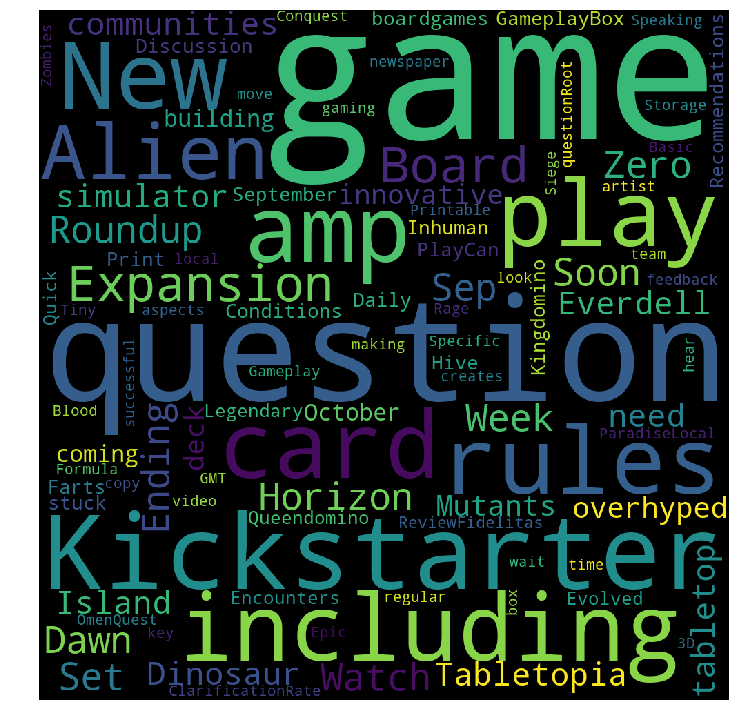

In [47]:
corpus_string = ''
for i in range(20):
    corpus_string = corpus_string + posts_combined.iloc[i]['title']

mycloud_2 = WordCloud(width=1000, height=1000,
                    collocations=False, #get rid of duplicates
                   normalize_plurals=True).generate_from_text(corpus_string)
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(mycloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)

# Executive Summary
---

In this project I looked at 2 subreddits and tried to build a classification model using 2 different methods. I started out by requesting the json from the Reddit API and pulling the specific data for posts. Using loops and a sleep delay, I pulled about 950 unique posts, 25 at a time per request. Using this data I created a dataframe and then used the specific title column to train a CountVectorizer to create a tokenized form of my titles. I also converted my subreddit column to binary for use during the classification process.
After building out my CountVectorizer, I created a random forest and a Gradient boost model to classify, utilizing a gridsearch to find the best parameters of the ones I believed to be important and influential, n_estimates (how many trees,etc) and max depth (how many layers the trees should split,etc).
From the post analyisis it can be seen that the random forest performed better overall, with a 5% higher score and about 2x fewer misclassifications